In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
similarities_df = pd.read_csv('similarities.csv', index_col=0)
videos_df = pd.read_csv('videos_df.csv', index_col=0)
embeddings_df = pd.read_csv('embeddings.csv', index_col=0)

In [3]:
embeddings_df.head()

,embedding_bert,embedding_mean_bert,embedding_hf
video_name,,,
DeepMind’s New AI: Assistant From The Future!,[[-4.11230952e-01 -3.07224512e-01 -1.23091914e...,[[-3.52466732e-01 -1.83229193e-01 4.56772596e...,[[-8.32884908e-02 -2.69665681e-02 3.02182939e...
Blender 4.1 - Create Virtual Worlds…For Free!,[[-9.96123999e-02 -3.39044273e-01 1.06826290e...,[[-4.75290045e-02 -1.54082075e-01 3.72303486e...,[[-3.85681652e-02 -2.80849040e-02 1.88307725e...
OpenAI Sora: Beauty And Horror!,[[-2.82204866e-01 -3.54010582e-01 -1.87018469e...,[[-7.50496238e-02 -1.62728757e-01 -4.48983237e...,[[-1.60020869e-02 2.15904936e-02 -1.71286725e...
OpenAI Sora Just Supercharged Filmmaking!,[[-1.08210146e-01 -2.12061957e-01 -6.52528554e...,[[-3.20733823e-02 -8.55088532e-02 1.85163632e...,[[-2.0056270e-02 -5.4418176e-02 -5.3889085e-02...
NVIDIA GTC: This Is The Future Of Everything!,[[-2.22307026e-01 -1.91042021e-01 -8.92981701e...,[[-2.48398125e-01 -3.30316648e-03 3.16924781e...,[[-7.43744001e-02 -1.52557064e-03 -1.84742920e...


In [20]:
similarities_df.columns

Index(['prompt', 'similarity_bert', 'similarity_hf', 'similarity_mean_bert'], dtype='object')

In [21]:
similarities_df.head()
columns_to_convert = ['similarity_bert', 'similarity_mean_bert', 'similarity_hf']
for column in columns_to_convert:
    similarities_df[column] = similarities_df[column].apply(ast.literal_eval)

## Exploring the mistakes

In [22]:
i = 2
relevant_row = similarities_df.iloc[i]
similarities_df.index[i]

'OpenAI Sora: Beauty And Horror!'

In [23]:
type(relevant_row['similarity_bert'])

list

In [24]:
# Create a dataframe with all the correct/incorrect predictions
predictions = pd.DataFrame(columns=['video_id', 'bert', 'hf', 'mean_bert'])
video_names = similarities_df.index.tolist()

for i in range(len(similarities_df.index)):
    bert = 0
    hf = 0
    mean_bert = 0

    relevant_row = similarities_df.iloc[i]
    similarities_bert = relevant_row['similarity_bert']
    similarities_hf = relevant_row['similarity_hf']
    similarities_mean_bert = relevant_row['similarity_mean_bert']

    closest_index_bert = np.argmax(similarities_bert)
    closest_index_hf = np.argmax(similarities_hf)
    closest_index_mean_bert = np.argmax(similarities_mean_bert)

    if video_names[closest_index_bert] == video_names[i]:
        bert = 1
    if video_names[closest_index_hf] == video_names[i]:
        hf = 1
    if video_names[closest_index_mean_bert] == video_names[i]:
        mean_bert = 1

    predictions = predictions._append({'video_id': video_names[i], 'bert': bert, 'hf': hf, 'mean_bert': mean_bert}, ignore_index=True)

In [29]:
print(f"Accuracy Bert: {predictions['bert'].sum() / len(similarities_df.index) * 100:.2f}%")
print(f"Accuracy HF: {predictions['hf'].sum() / len(similarities_df.index) * 100:.2f}%")
print(f"Accuracy Mean Bert: {predictions['mean_bert'].sum() / len(similarities_df.index) * 100:.2f}%")

Accuracy Bert: 1.60%
Accuracy HF: 56.62%
Accuracy Mean Bert: 23.97%


In [33]:
num_videos = len(similarities_df.index)

# Initialize matrices to hold the top 3 indicators for each method
top3_matrix_bert = np.zeros((num_videos, num_videos))
top3_matrix_hf = np.zeros((num_videos, num_videos))
top3_matrix_mean_bert = np.zeros((num_videos, num_videos))

In [45]:
predictions = pd.DataFrame(columns=['video_id', 'bert', 'hf', 'mean_bert'])
video_names = similarities_df.index.tolist()
n_top_samples = 10

for i in range(len(similarities_df.index)):
    bert = 0
    hf = 0
    mean_bert = 0

    relevant_row = similarities_df.iloc[i]
    similarities_bert = relevant_row['similarity_bert']
    similarities_hf = relevant_row['similarity_hf']
    similarities_mean_bert = relevant_row['similarity_mean_bert']

    # Get indices of the top 3 videos by similarity for each method
    top3_indices_bert = np.argsort(similarities_bert)[-n_top_samples:][::-1]
    top3_indices_hf = np.argsort(similarities_hf)[-n_top_samples:][::-1]
    top3_indices_mean_bert = np.argsort(similarities_mean_bert)[-n_top_samples:][::-1]

    # Fill the matrices for top 3 indicators
    top3_matrix_bert[i, top3_indices_bert] = 1
    top3_matrix_hf[i, top3_indices_hf] = 1
    top3_matrix_mean_bert[i, top3_indices_mean_bert] = 1

    # Check if the current video is among the top 3 for each method
    if video_names[i] in [video_names[idx] for idx in top3_indices_bert]:
        bert = 1
    if video_names[i] in [video_names[idx] for idx in top3_indices_hf]:
        hf = 1
    if video_names[i] in [video_names[idx] for idx in top3_indices_mean_bert]:
        mean_bert = 1

    predictions = predictions._append({'video_id': video_names[i], 'bert': bert, 'hf': hf, 'mean_bert': mean_bert}, ignore_index=True)

In [46]:
print(f"Accuracy Bert: {predictions['bert'].sum() / len(similarities_df.index) * 100:.2f}%")
print(f"Accuracy HF: {predictions['hf'].sum() / len(similarities_df.index) * 100:.2f}%")
print(f"Accuracy Mean Bert: {predictions['mean_bert'].sum() / len(similarities_df.index) * 100:.2f}%")

Accuracy Bert: 8.22%
Accuracy HF: 83.68%
Accuracy Mean Bert: 46.00%


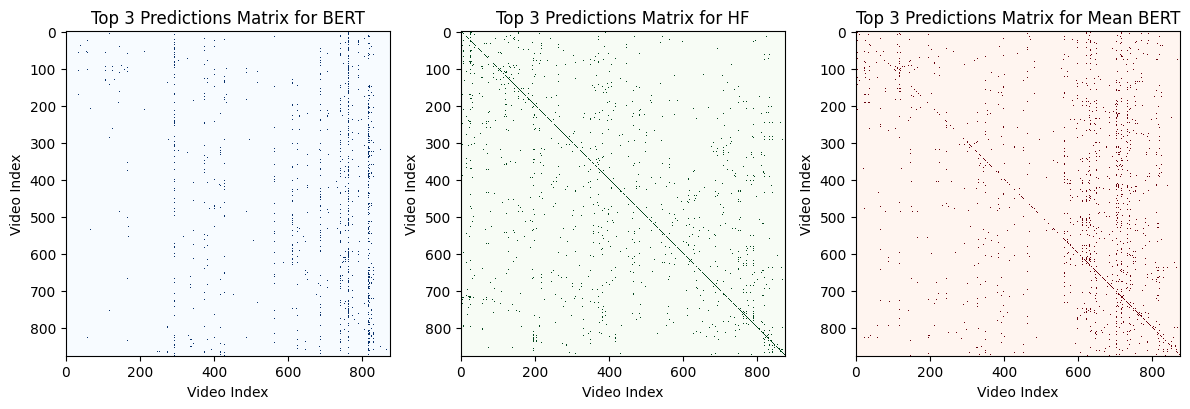

In [47]:
# Plotting the matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 12))

axes[0].imshow(top3_matrix_bert, cmap='Blues', interpolation='nearest')
axes[0].set_title('Top 3 Predictions Matrix for BERT')
axes[0].set_xlabel('Video Index')
axes[0].set_ylabel('Video Index')

axes[1].imshow(top3_matrix_hf, cmap='Greens', interpolation='nearest')
axes[1].set_title('Top 3 Predictions Matrix for HF')
axes[1].set_xlabel('Video Index')
axes[1].set_ylabel('Video Index')

axes[2].imshow(top3_matrix_mean_bert, cmap='Reds', interpolation='nearest')
axes[2].set_title('Top 3 Predictions Matrix for Mean BERT')
axes[2].set_xlabel('Video Index')
axes[2].set_ylabel('Video Index')

plt.tight_layout()
plt.show()